In [2]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import os
import glob

## Read the regular run input

In [3]:
# bin to cluster (8,302 lines)
cdb = pd.read_csv('input/Cdb.csv')
cdb['sample'] = cdb['genome'].str.split('_').str[0]

cdb.to_excel('results/First_clusters_details.xlsx', index=False)
cdb.head()

,genome,secondary_cluster,threshold,cluster_method,comparison_algorithm,primary_cluster,sample
0,VG36F3_maxbin.004.fa,1_1,0.05,average,fastANI,1,VG36F3
1,VGYSAU_maxbin.084.fa,1_1,0.05,average,fastANI,1,VGYSAU
2,VF8Q00_metabat.189.fa,2_1,0.05,average,fastANI,2,VF8Q00
3,VZ5D83_maxbin.010.fa,2_1,0.05,average,fastANI,2,VZ5D83
4,VE8VBP_maxbin.008.fa,3_0,0.05,average,fastANI,3,VE8VBP


In [4]:
sm = len(cdb['sample'].unique())
print('Number of samples: ', sm)

gn = len(cdb['genome'].unique())
print('Total number of bins: ', gn)

cl1 = len(cdb['primary_cluster'].unique())
print('Number of primary clusters: ', cl1)

cl2 = len(cdb['secondary_cluster'].unique())
print('Number of secondary clusters: ', cl2)

Number of samples:  142
Total number of bins:  8302
Number of primary clusters:  1043
Number of secondary clusters:  1196


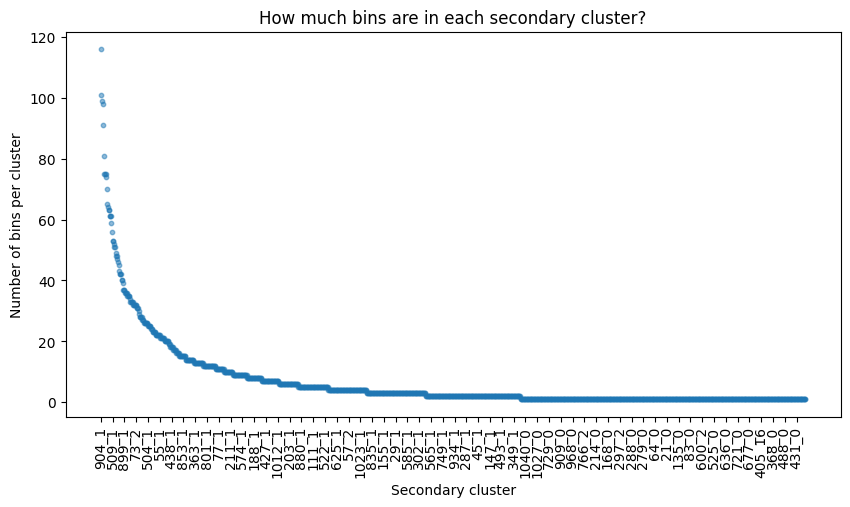

In [15]:
cldet = cdb['secondary_cluster'].value_counts()

# plot
plt.figure(figsize=(10, 5))
plt.scatter(cldet.index, cldet.values, s=10, alpha=0.5)
plt.xticks(cldet.index[::20])
plt.xticks(rotation=90)
plt.xlabel('Secondary cluster')
plt.ylabel('Number of bins per cluster')
plt.title('How much bins are in each secondary cluster?')

plt.savefig('results/secondary_cluster.png', dpi=300, bbox_inches='tight')

In [6]:
# compl & contam (10,010 lines)
gen = pd.read_csv('input/genomeInformation.csv')
gen.head()

,genome,completeness,contamination,strain_heterogeneity,length,N50,centrality
0,V0404P_181434.fa,98.66,0.00,0.00,1908262,52167,0.988038
1,V0404P_184256.fa,94.54,0.19,50.00,2178702,48365,0.986244
2,V0404P_220966_sub.fa,99.32,44.75,26.27,6538835,16643,0.000000
3,V0404P_maxbin.037.fa,93.62,4.70,0.00,2464390,38398,0.990315
4,V0404P_metabat.110.fa,97.34,0.48,100.00,2680403,63941,0.977108


## Compare with the faster run results

In [21]:
# bin to cluster (8,302 lines)
cdbF = pd.read_csv('input/faster/Cdb.csv')
cdbF['sample'] = cdbF['genome'].str.split('_').str[0]

cdbF.to_excel('results/First_clusters_FastRun_details.xlsx', index=False)
cdbF.head()

,genome,threshold,cluster_method,comparison_algorithm,greedy_representative,primary_cluster,original_secondary_cluster,secondary_cluster,sample
0,V0404P_175861.fa,0.05,greedy,fastANI,False,875,875_1,875_1,V0404P
1,V1T1XL_vamb.223401.fa,0.05,greedy,fastANI,False,875,875_1,875_1,V1T1XL
2,V2WX6R_metabat.149.fa,0.05,greedy,fastANI,False,875,875_1,875_1,V2WX6R
3,V3VRBX_metabat.127.fa,0.05,greedy,fastANI,False,875,875_1,875_1,V3VRBX
4,V403E2_vamb.172635.fa,0.05,greedy,fastANI,False,875,875_1,875_1,V403E2


In [9]:
sm = len(cdb['sample'].unique())
smF = len(cdbF['sample'].unique())
print('Number of samples: ', sm, smF)

gn = len(cdb['genome'].unique())
gnF = len(cdbF['genome'].unique())
print('Total number of bins: ', gn , gnF)

cl1 = len(cdb['primary_cluster'].unique())
cl1F = len(cdbF['primary_cluster'].unique())
print('Number of primary clusters: ', cl1, cl1F)

cl2 = len(cdb['secondary_cluster'].unique())
cl2F = len(cdbF['secondary_cluster'].unique())
print('Number of secondary clusters: ', cl2, cl2F)

Number of samples:  142 142
Total number of bins:  8302 8482
Number of primary clusters:  1043 1066
Number of secondary clusters:  1196 1208


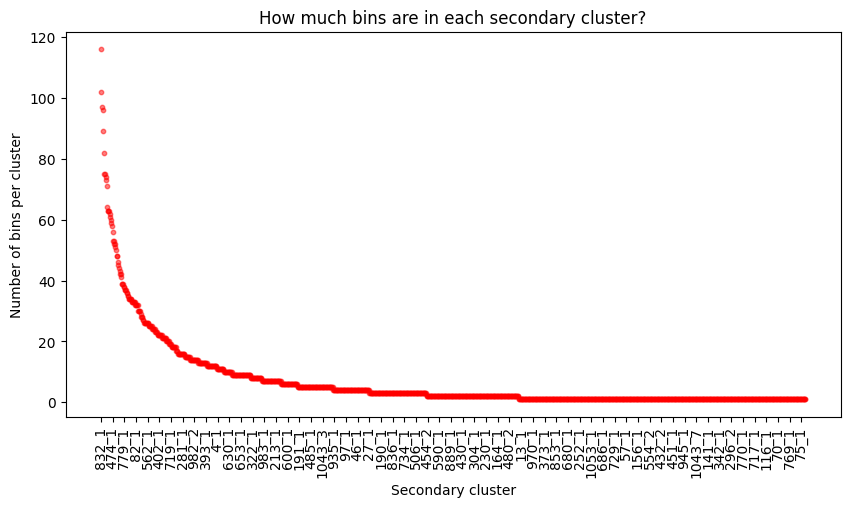

In [14]:
cldetF = cdbF['secondary_cluster'].value_counts()

# plot
plt.figure(figsize=(10, 5))
plt.scatter(cldetF.index, cldetF.values, s=10, alpha=0.5, color='red')
plt.xticks(cldetF.index[::20])
plt.xticks(rotation=90)
plt.xlabel('Secondary cluster')
plt.ylabel('Number of bins per cluster')
plt.title('How much bins are in each secondary cluster?')

plt.savefig('results/secondary_cluster_faster.png', dpi=300, bbox_inches='tight')

## Add C&C values

In [41]:
# bin to cluster (8,302 lines)
cdbF = pd.read_csv('input/Cdb.csv')
cdbF['sample'] = cdbF['genome'].str.split('_').str[0]

# bins C&C
gen = pd.read_csv('input/genomeInformation.csv')
mrg = pd.merge(cdbF, gen, on=['genome'])
mrg = mrg[['genome','sample','primary_cluster', 'secondary_cluster','completeness', 'contamination', 'strain_heterogeneity', 'length', 'N50', 'centrality']]
mrg.to_excel('results/First_clusters_RegularRun_details.xlsx', index=False)
mrg.head()

,genome,sample,primary_cluster,secondary_cluster,completeness,contamination,strain_heterogeneity,length,N50,centrality
0,VG36F3_maxbin.004.fa,VG36F3,1,1_1,96.63,0.00,0.0,1727092,48685,0.987493
1,VGYSAU_maxbin.084.fa,VGYSAU,1,1_1,96.63,0.19,0.0,1697880,46357,0.987603
2,VF8Q00_metabat.189.fa,VF8Q00,2,2_1,94.38,0.00,0.0,1510566,23849,0.977568
3,VZ5D83_maxbin.010.fa,VZ5D83,2,2_1,96.63,0.00,0.0,1600988,250463,0.975966
4,VE8VBP_maxbin.008.fa,VE8VBP,3,3_0,96.63,0.00,0.0,1563350,94782,0.000000


In [42]:
# bin to cluster (8,302 lines)
cdbF = pd.read_csv('input/faster/Cdb.csv')
cdbF['sample'] = cdbF['genome'].str.split('_').str[0]

# bins C&C
gen = pd.read_csv('input/faster/genomeInformation.csv')
mrg = pd.merge(cdbF, gen, on=['genome'])
mrg = mrg[['genome','sample','primary_cluster', 'original_secondary_cluster', 'secondary_cluster','completeness', 'contamination', 'strain_heterogeneity', 'length', 'N50', 'centrality']]
mrg.to_excel('results/First_clusters_FastRun_details.xlsx', index=False)
mrg.head()


,genome,sample,primary_cluster,original_secondary_cluster,secondary_cluster,completeness,contamination,strain_heterogeneity,length,N50,centrality
0,V0404P_175861.fa,V0404P,875,875_1,875_1,84.48,0.0,0.0,2184033,60660,0.983818
1,V1T1XL_vamb.223401.fa,V1T1XL,875,875_1,875_1,91.38,0.0,0.0,2306061,74991,0.982669
2,V2WX6R_metabat.149.fa,V2WX6R,875,875_1,875_1,82.76,0.0,0.0,2140677,44468,0.982925
3,V3VRBX_metabat.127.fa,V3VRBX,875,875_1,875_1,84.48,0.0,0.0,2269557,96270,0.980505
4,V403E2_vamb.172635.fa,V403E2,875,875_1,875_1,94.83,0.0,0.0,2432180,53881,0.980045


In [45]:
mrg[mrg['original_secondary_cluster'] != mrg['secondary_cluster']]

,genome,sample,primary_cluster,original_secondary_cluster,secondary_cluster,completeness,contamination,strain_heterogeneity,length,N50,centrality
1384,V0404P_metabat.62.fa,V0404P,312,312_1,312_1.2,83.62,7.76,33.33,1734432,4942,0.952107
1385,V0O0SI_vamb.125371.fa,V0O0SI,312,312_2,312_1.2,100.00,6.03,0.00,2191363,104643,0.963557
1386,V2WX6R_vamb.148654.fa,V2WX6R,312,312_1,312_1.2,100.00,2.59,0.00,2249154,69256,0.961914
1387,V32MIP_vamb.23087.fa,V32MIP,312,312_1,312_1.2,98.28,2.59,0.00,2356219,84226,0.961504
1388,V3MK5S_maxbin.089.fa,V3MK5S,312,312_2,312_1.2,96.55,3.45,0.00,2068265,140005,0.960874
...,...,...,...,...,...,...,...,...,...,...,...
8295,VN82MY_maxbin.082.fa,VN82MY,96,96_2,113.96_1.2,93.97,0.00,0.00,1099868,107610,0.981382
8296,VR54L3_metabat.131.fa,VR54L3,96,96_2,113.96_1.2,93.97,0.00,0.00,1090965,304708,0.983554
8297,VRKHLF_maxbin.047.fa,VRKHLF,96,96_1,113.96_1.2,94.83,0.00,0.00,1352437,142650,0.960007
8298,VY1MGO_metabat.136.fa,VY1MGO,96,96_1,113.96_1.2,93.97,0.00,0.00,1103199,135653,0.983391


In [37]:
mrg[mrg['secondary_cluster'] == '875_1'].sort_values(by=['sample'], ascending=False)

,genome,sample,primary_cluster,original_secondary_cluster,secondary_cluster,completeness,contamination,strain_heterogeneity,length,N50,centrality
38,VZ5D83_maxbin.041.fa,VZ5D83,875,875_1,875_1,91.38,0.00,0.00,2260877,45104,0.981168
37,VY36ZZ_metabat.152_sub.fa,VY36ZZ,875,875_1,875_1,79.31,0.00,0.00,2234191,63477,0.981354
36,VS0RGM_maxbin.008.fa,VS0RGM,875,875_1,875_1,100.00,5.33,40.00,2527348,264414,0.979241
35,VRKHLF_vamb.149857.fa,VRKHLF,875,875_1,875_1,79.31,0.00,0.00,2066505,68229,0.980048
34,VR684N_130241.fa,VR684N,875,875_1,875_1,79.31,3.45,0.00,2128227,48245,0.982805
33,VR54L3_vamb.170583.fa,VR54L3,875,875_1,875_1,84.48,0.86,0.00,2036902,98461,0.979286
32,VR339W_maxbin.036.fa,VR339W,875,875_1,875_1,77.59,0.00,0.00,2054283,65601,0.983290
31,VOTVAJ_vamb.87077.fa,VOTVAJ,875,875_1,875_1,82.76,0.00,0.00,2104051,57707,0.981864
30,VOKWVZ_metabat.12.fa,VOKWVZ,875,875_1,875_1,77.59,0.00,0.00,1896967,82008,0.981899
29,VO615S_vamb.95177.fa,VO615S,875,875_1,875_1,82.76,0.00,0.00,2146825,88331,0.981861
